In [1]:
from PIL import Image
import pygsp.graphs as graphs
import numpy as np
import matplotlib.pyplot as plt
import spectral_denoiser
import importlib

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load Image

In [2]:
N = 80
True_Image = np.asarray(Image.open("noodle.jpg").resize((N,N)))
G = graphs.Grid2d(N)

# Gaussian Model

In [3]:
Denoising_Machine = spectral_denoiser.Spectral_Denoiser(G)

In [4]:
Noisy_Image = True_Image + np.random.randn(N,N,3)*100
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

Denoised_Image = Denoising_Machine.remove_gaussian_noise(Noisy_Reshaped)
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

2023-04-23 23:01:12,014:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


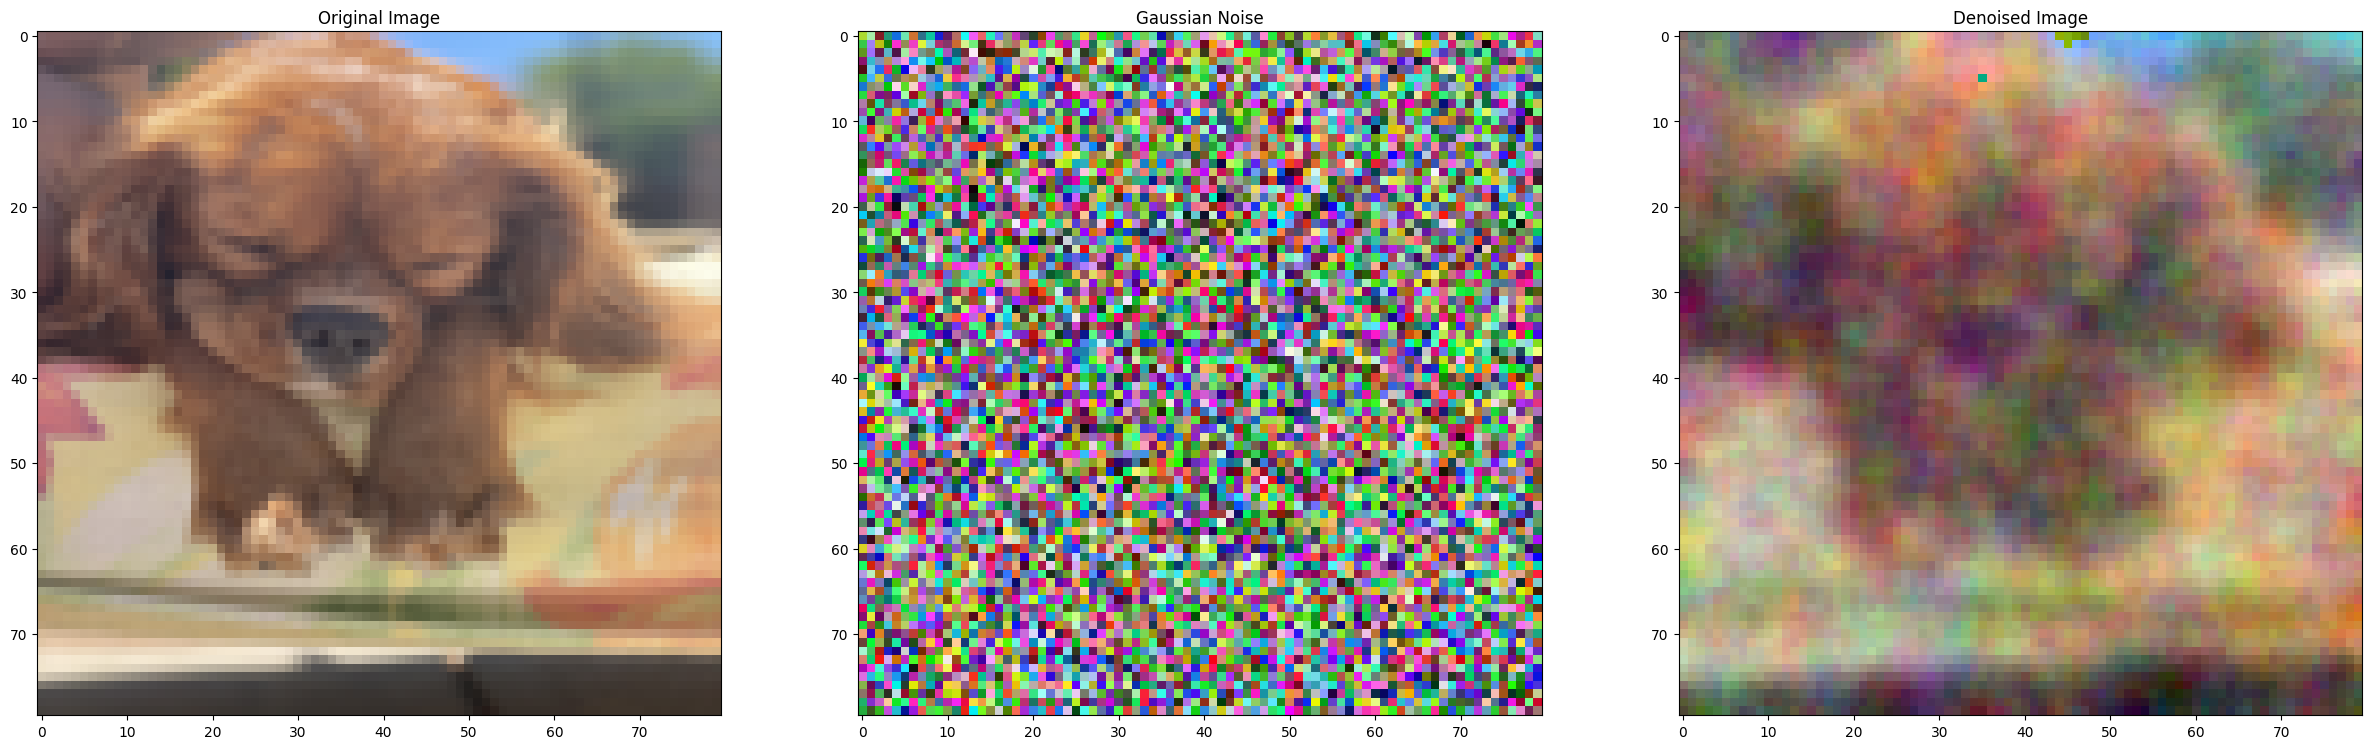

In [5]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[0].set_title("Original Image")
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[1].set_title("Gaussian Noise")
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))
ax[2].set_title("Denoised Image")
plt.show()

# Bernoulli Noise Model

In [12]:
Noisy_Image = True_Image * (np.random.randn(N,N,3) < -1.5)
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

Denoised_Image = Denoising_Machine.remove_bernoulli_noise(Noisy_Reshaped, method = 'approximate', time = 500)
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

100%|█████████████████████████████████████████| 500/500 [00:07<00:00, 65.78it/s]


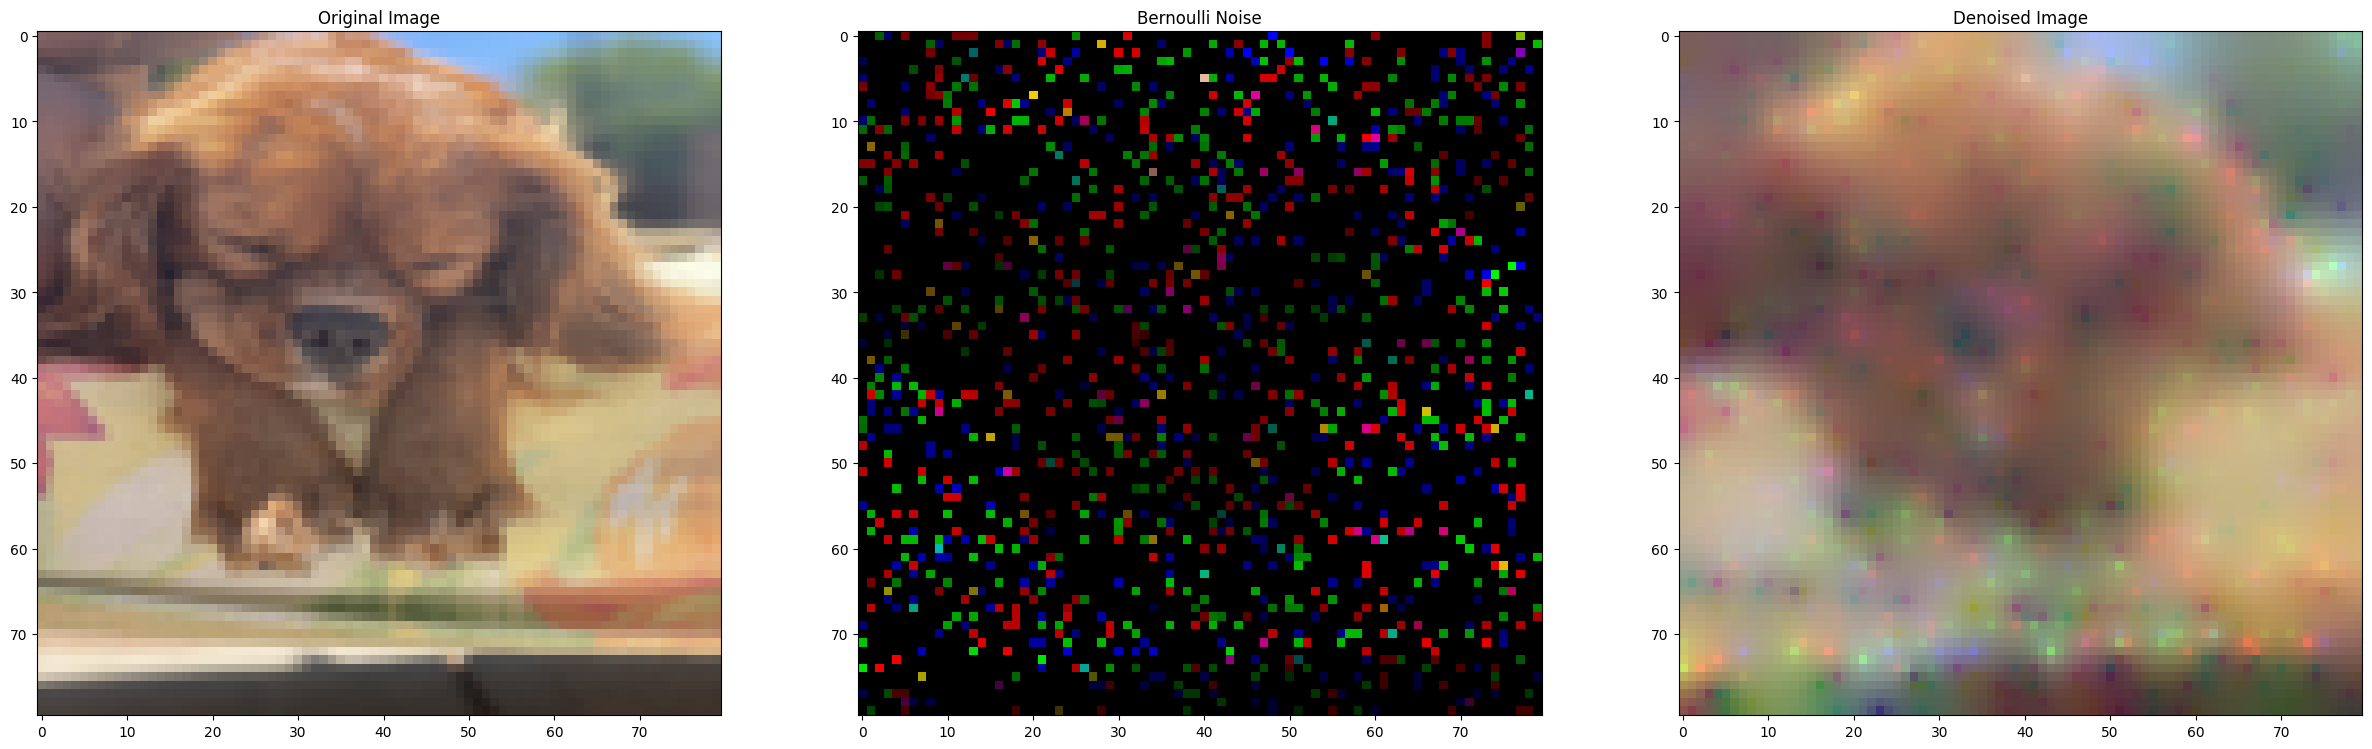

In [13]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[0].set_title("Original Image")
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[1].set_title("Bernoulli Noise")
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))
ax[2].set_title("Denoised Image")
plt.show()

# Uniform Noise Model

In [14]:
Noisy_Image = True_Image * np.random.uniform(0,1,N*N*3).reshape(N,N,3)
Noisy_Reshaped = Noisy_Image.reshape(-1,3)

In [16]:
Denoising_Machine = spectral_denoiser.Spectral_Denoiser(G)
Denoised_Image = Denoising_Machine.remove_uniform_noise(Noisy_Reshaped)
Denoised_Image_Reshaped = Denoised_Image.reshape(N,N,3)

0.00020570382948029286
Truth unknown
Final Cost: [[30287.69806967]] Achieved in 3 Iterations
Final Cost: [[28414.0564158]] Achieved in 3 Iterations
Final Cost: [[26684.86509002]] Achieved in 4 Iterations


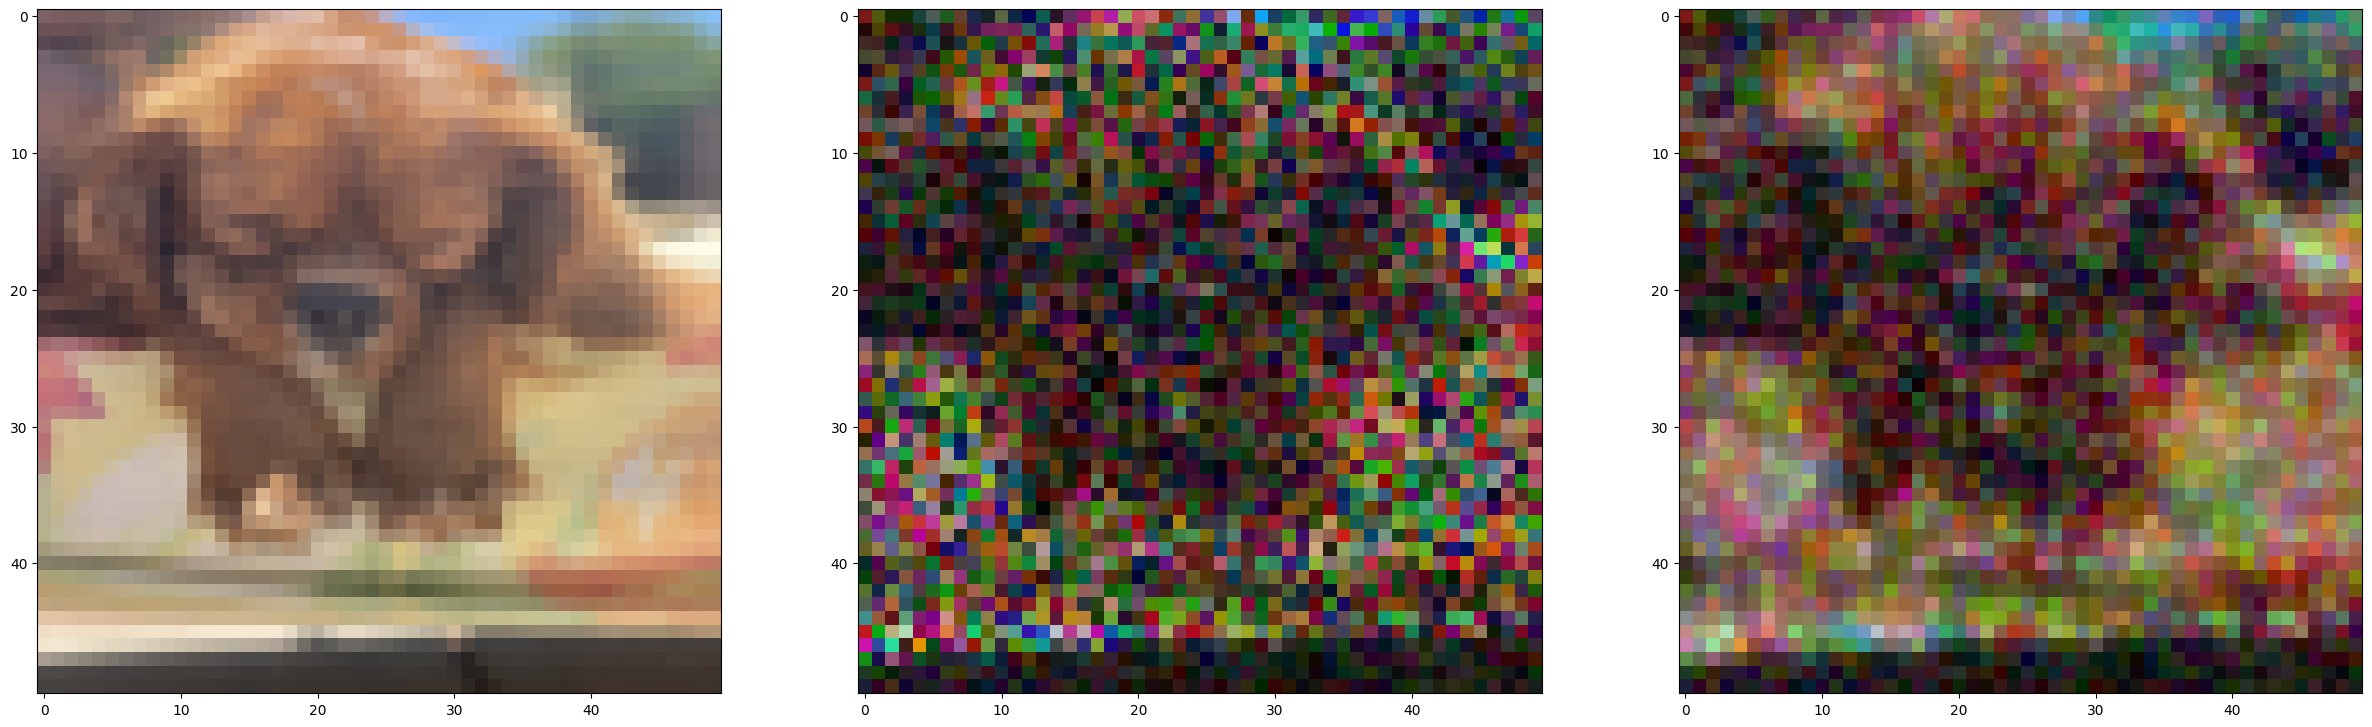

In [95]:
fig, ax = plt.subplots(1,3, figsize=(30,10))

ax[0].imshow(True_Image.astype(np.uint8))
ax[1].imshow(Noisy_Image.astype(np.uint8))
ax[2].imshow(Denoised_Image_Reshaped.astype(np.uint8))